<a href="https://colab.research.google.com/github/atobrak/seismics/blob/main/Final_Theory_of_seismic_waves_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This project** represents the Exercise for the **Theory of Seismic waves** course at the University of Helsinki.

@ copyright **Kwabena Mensah Atobra**
Doctoral Researcher 
Institute of Seismology 
University of Helsinki

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive

/content/drive


In [3]:
cd MyDrive/

/content/drive/MyDrive


In [4]:
cd seismic_waves_1D

/content/drive/MyDrive/seismic_waves_1D


In [5]:
#### Import necessary modules
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from scipy import meshgrid
import os
import random


In [6]:
from matplotlib.animation import FuncAnimation

In [7]:
#Def of the initial condition    
def I(x):
    """
    Single space variable fonction that 
    represent the wave form at t = 0
    """
    #return np.exp(-(x)**2/0.01)
    #return abs(np.log((x+0.1) ** 2)) 
    return (random.uniform(0, 1))* 1e-2


In [8]:
## the celer function would be modified to wave speed later
## It would be made to vary based on material properties and lame's parameters lamda and miu


def celer(x):
    
    # Single space variable fonction that represent 
    # the wave's velocity at a position x
    
    if x <=0.7:
        return 1
    else:
        return 0.5

def Rho(x, before_val = 300, before_return = 1.115, after_return= 1.115):
    
    # Single space variable fonction that represent 
    # the wave's velocity at a position x
    
    if x <=before_val:
        return before_return
    else:
        return after_return


def Kappa(x, before_val = 300, before_return = 141.2, after_return= 141.2):


    before_return = before_return * 1e3
    after_return = after_return * 1e3

    

      
   
    
    if x <=before_val:
        return before_return
    else:
        return after_return

  

In [9]:
loop_exec = 1  # Processing loop execution flag to ensure that an appropriate boundary condition is chosen before execution

left_bound_cond = 1  #Boundary cond 1 : Dirichlet, 2 : Neumann, 3 Mur
right_bound_cond = 1  #Boundary cond 1 : Dirichlet, 2 : Neumann, 3 Mur

if left_bound_cond not in [1,2,3]:
    loop_exec = 0
    print("Please choose a correct left boundary condition")

if right_bound_cond not in [1,2,3]:
    loop_exec = 0
    print("Please choose a correct right boundary condition")



In [10]:

#Spatial mesh - i indices
L_x = 1000 #Range of the domain according to x [m]
dx = 1 #Infinitesimal distance
N_x = int(L_x/dx) #Points number of the spatial mesh
X = np.linspace(0,L_x,N_x) #Spatial array



# #Temporal mesh with CFL < 1 - j indices
# L_t = 4 #Duration of simulation [s]
# dt = 0.1*dx  #Infinitesimal time with CFL (Courant–Friedrichs–Lewy condition)
# N_t = int(L_t/dt) #Points number of the temporal mesh
# T = np.linspace(0,L_t,N_t) #Temporal array



In [11]:
print(len(X))

1000


In [12]:

#density array for calculation (finite elements)
rho = np.zeros(N_x, float)
for i in range(0,N_x):
    rho[i] = Rho(X[i])


In [13]:
rho

array([1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115,
       1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115,
       1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115,
       1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115,
       1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115,
       1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115,
       1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115,
       1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115,
       1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115,
       1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115,
       1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115,
       1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115,
       1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115,
       1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115, 1.115,
       1.115, 1.115,

In [14]:
#density array for calculation (finite elements)
kappa = np.zeros(N_x, float)
for i in range(0,N_x):
    kappa[i] = Kappa(X[i])


In [15]:
kappa

array([141200., 141200., 141200., 141200., 141200., 141200., 141200.,
       141200., 141200., 141200., 141200., 141200., 141200., 141200.,
       141200., 141200., 141200., 141200., 141200., 141200., 141200.,
       141200., 141200., 141200., 141200., 141200., 141200., 141200.,
       141200., 141200., 141200., 141200., 141200., 141200., 141200.,
       141200., 141200., 141200., 141200., 141200., 141200., 141200.,
       141200., 141200., 141200., 141200., 141200., 141200., 141200.,
       141200., 141200., 141200., 141200., 141200., 141200., 141200.,
       141200., 141200., 141200., 141200., 141200., 141200., 141200.,
       141200., 141200., 141200., 141200., 141200., 141200., 141200.,
       141200., 141200., 141200., 141200., 141200., 141200., 141200.,
       141200., 141200., 141200., 141200., 141200., 141200., 141200.,
       141200., 141200., 141200., 141200., 141200., 141200., 141200.,
       141200., 141200., 141200., 141200., 141200., 141200., 141200.,
       141200., 1412

In [16]:
# Defining initial conditions

#density array for calculation (finite elements)
t_init = np.zeros(N_x, float)
for i in range(0,N_x):
    t_init[i] = I(X[i])


In [17]:
t_init

array([5.38212397e-03, 2.11581725e-03, 1.68683061e-03, 3.56955437e-04,
       8.46385707e-03, 5.09756060e-03, 8.73847633e-03, 5.00436579e-03,
       3.55837191e-03, 2.55161226e-03, 8.43263030e-04, 3.64951598e-03,
       6.71428057e-03, 1.38955585e-03, 6.49063048e-03, 4.07411089e-03,
       2.72502999e-03, 5.36299666e-03, 3.34822477e-03, 1.15447756e-03,
       1.72152933e-03, 5.32659255e-03, 5.46102665e-03, 2.98188495e-03,
       4.27307965e-04, 5.13871609e-03, 5.26004324e-03, 6.52218609e-04,
       4.13993289e-03, 2.06730008e-03, 7.27434839e-03, 8.99916695e-06,
       3.53384191e-03, 7.86482693e-04, 5.19885800e-03, 6.77112437e-03,
       2.26918340e-03, 3.94528823e-03, 1.99286786e-03, 6.35010358e-03,
       9.76636975e-03, 1.64139318e-03, 9.62623012e-03, 8.00371588e-03,
       6.80278295e-03, 2.78674689e-03, 7.89773352e-03, 5.85048762e-03,
       8.32980447e-03, 8.90664023e-03, 8.15758974e-03, 2.88295079e-03,
       3.14348296e-03, 6.28402570e-03, 6.43314308e-03, 1.49248296e-03,
      

In [18]:
c_norm = 1

In [19]:

#Velocity array for calculation (finite elements)
c = np.zeros(N_x, float)
for i in range(0,N_x):
    #c[i] = celer(X[i])

    c[i] = (np.sqrt(kappa[i]/rho[i]))/c_norm



In [20]:
c

array([355.86060656, 355.86060656, 355.86060656, 355.86060656,
       355.86060656, 355.86060656, 355.86060656, 355.86060656,
       355.86060656, 355.86060656, 355.86060656, 355.86060656,
       355.86060656, 355.86060656, 355.86060656, 355.86060656,
       355.86060656, 355.86060656, 355.86060656, 355.86060656,
       355.86060656, 355.86060656, 355.86060656, 355.86060656,
       355.86060656, 355.86060656, 355.86060656, 355.86060656,
       355.86060656, 355.86060656, 355.86060656, 355.86060656,
       355.86060656, 355.86060656, 355.86060656, 355.86060656,
       355.86060656, 355.86060656, 355.86060656, 355.86060656,
       355.86060656, 355.86060656, 355.86060656, 355.86060656,
       355.86060656, 355.86060656, 355.86060656, 355.86060656,
       355.86060656, 355.86060656, 355.86060656, 355.86060656,
       355.86060656, 355.86060656, 355.86060656, 355.86060656,
       355.86060656, 355.86060656, 355.86060656, 355.86060656,
       355.86060656, 355.86060656, 355.86060656, 355.86

In [21]:
c = c.tolist()

In [22]:
c

[355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,
 355.8606065588722,


In [23]:
c_max = np.max(c)
c_max

355.8606065588722

In [24]:
Courant_number = 0.55

In [25]:
dt = (Courant_number * dx)/c_max

In [26]:
dt

0.0015455489870554418

In [27]:

#Temporal mesh with CFL < 1 - j indices
L_t = 4 #Duration of simulation [s]
#dt = 0.1*dx  #Infinitesimal time with CFL (Courant–Friedrichs–Lewy condition)
N_t = int(L_t/dt) #Points number of the temporal mesh
T = np.linspace(0,L_t,N_t) #Temporal array



In [28]:
print(len(T)*dt)

3.9998807784994836


In [29]:
#Courant number array for calculation (finite elements)
Cu = np.zeros(N_x, float)
for i in range(0,N_x):
    #c[i] = celer(X[i])

    Cu[i] = ((np.sqrt(kappa[i]/rho[i]))/c_norm) * (dt/dx)


In [30]:
Cu

array([0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55,
       0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55,
       0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55,
       0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55,
       0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55,
       0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55,
       0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55,
       0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55,
       0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55,
       0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55,
       0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55,
       0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55,
       0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55,
       0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.

**Source- Time Function**

In [31]:
# Calculating the source - time function

t0 = 0.5 

f = 5

# define an array call t_div = t -t0

t_div = []

for t in T:

  a = t - t0

  t_div.append(a)


source_t = []

for i in t_div:

  b = -8 * f * i * np.exp(-4 * (f**2) * (i**2))

  source_t.append(b)



# # calculating the second differential of the source function
# source_t_diff2 = []

# for i in t_div:

#   e = (3 -(8 * (i**2) *(f**2)))*(64 * (i**2)*(f**3))*(np.exp(-4 * (f**2) * (i**2)))

#   source_t_diff2.append(e)






In [32]:
source_t

[2.7775887729928043e-10,
 3.231240780891102e-10,
 3.75715282913609e-10,
 4.3665309366123565e-10,
 5.072269681340426e-10,
 5.88919884357816e-10,
 6.834364872897366e-10,
 7.927351915480321e-10,
 9.190647755667003e-10,
 1.0650060720415315e-09,
 1.2335194375860968e-09,
 1.427998772162433e-09,
 1.652332957204856e-09,
 1.9109756916516166e-09,
 2.2090248287058144e-09,
 2.5523124545776037e-09,
 2.9475071053883196e-09,
 3.4022296916926425e-09,
 3.925184893739583e-09,
 4.526310006898423e-09,
 5.216943458103939e-09,
 6.010015483460908e-09,
 6.920263757296027e-09,
 7.964477097265559e-09,
 9.16177074224822e-09,
 1.0533897113661883e-08,
 1.2105596430910164e-08,
 1.3904992062677803e-08,
 1.5964036062990215e-08,
 1.831901097006688e-08,
 2.1011094643287247e-08,
 2.4086995685882736e-08,
 2.7599667855728183e-08,
 3.160911281193836e-08,
 3.618328158972055e-08,
 4.139908634970128e-08,
 4.734353522116041e-08,
 5.4115004462605436e-08,
 6.182466371016098e-08,
 7.059807178764401e-08,
 8.057696242630918e-08,
 9

In [33]:
#source_t_diff2

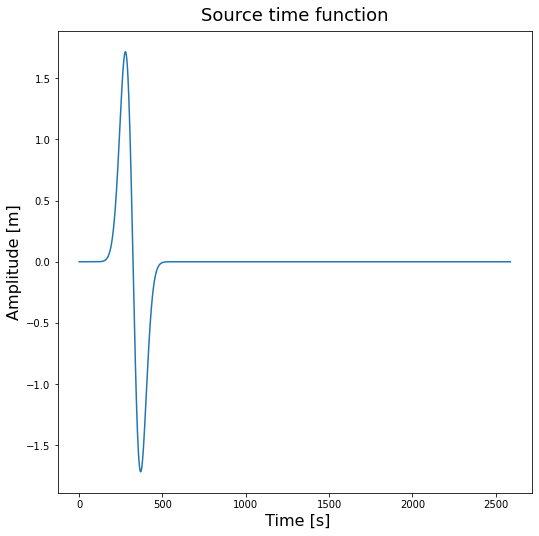

In [34]:
# Ploting pore pressures
plt.rcParams["figure.figsize"] = (8.5,8.5)


#plt.scatter(xval, yval)


# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'DejaVu Sans', 'size':'18', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'DejaVu Sans', 'size':'16'}




plt.plot(source_t)


plt.xlabel(" Time [s]", **axis_font)
plt.ylabel("Amplitude [m]", **axis_font)




plt.title("Source time function", **title_font)






plt.savefig('Source time function.png')


In [35]:
#plt.plot(source_t_diff2)

Implementing 1 D wave equation

In [36]:
# N_t = 10
# N_x = 100

# dt = 0.1
# dx = 1

In [37]:
# Initialize a global solution matrices


P = np.zeros((N_t,N_x),float) #  Create a vector for the Global solution

C = np.zeros((N_t,N_x),float) #  Create a vector for the velocity expressed in global terms

#C = np.ones((N_t,N_x),float) #  Create a vector for the velocity expressed in global terms

S = np.zeros((N_t,N_x),float) #  Create a vector for the source function expressed in global terms

#S = np.ones((N_t,N_x),float) #  Create a vector for the source function expressed in global terms


In [38]:
# Inserting initial conditions

# no initial condition but a source time function

#P[0][:] = t_init

In [39]:
P

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
# Transpose source matrix before inserting source.time function

S_t = S.T

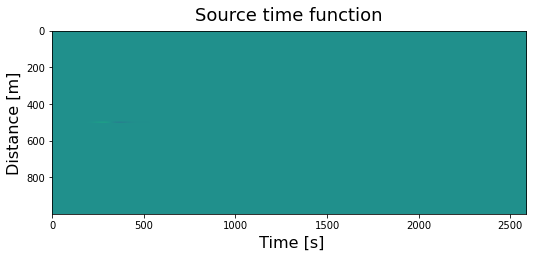

In [41]:
# inserting source time function

S_t[int(N_x/2)] = source_t



# Ploting pore pressures
plt.rcParams["figure.figsize"] = (8.5,8.5)


#plt.scatter(xval, yval)


# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'DejaVu Sans', 'size':'18', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'DejaVu Sans', 'size':'16'}




plt.imshow(S_t)


plt.xlabel(" Time [s]", **axis_font)
plt.ylabel("Distance [m]", **axis_font)




plt.title("Source time function", **title_font)


plt.savefig('Source time function_2.png')

In [42]:
# broadcasting courant number list into courant number matrix

#C[...] = Cu

C[...] = c

In [43]:
# Transpose source matrix back with the source-time function included

S = S_t.T

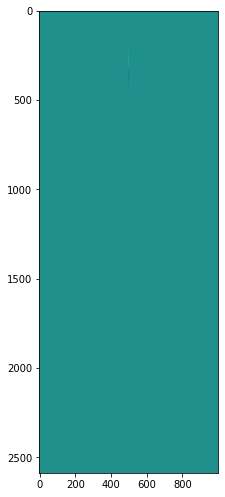

In [44]:
S
plt.imshow(S)

In [45]:
P

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
C

array([[355.86060656, 355.86060656, 355.86060656, ..., 355.86060656,
        355.86060656, 355.86060656],
       [355.86060656, 355.86060656, 355.86060656, ..., 355.86060656,
        355.86060656, 355.86060656],
       [355.86060656, 355.86060656, 355.86060656, ..., 355.86060656,
        355.86060656, 355.86060656],
       ...,
       [355.86060656, 355.86060656, 355.86060656, ..., 355.86060656,
        355.86060656, 355.86060656],
       [355.86060656, 355.86060656, 355.86060656, ..., 355.86060656,
        355.86060656, 355.86060656],
       [355.86060656, 355.86060656, 355.86060656, ..., 355.86060656,
        355.86060656, 355.86060656]])

In [47]:
for n in range(1, N_t-1):

  for j in range(2, N_x-2):

    P[n+1][j] = ((dt/dx)**2) * (C[n+1][j]**2) * (P[n][j+1] - 2 * P[n][j] + P[n][j-1] ) + 2*P[n][j] - P[n-1][j] + (dt**2)*S[n+1][j]

In [48]:
P

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  1.06608188e-17, ...,
        -4.29140381e-18,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.29823379e-17, ...,
        -1.47411543e-17,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  8.70572185e-19, ...,
        -9.54862393e-18,  0.00000000e+00,  0.00000000e+00]])

In [49]:
P[30]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

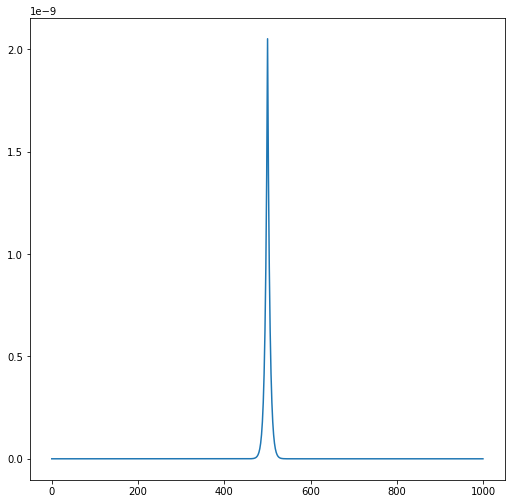

In [50]:
plt.plot(P[100])

In [51]:
p_max = np.max(P)
p_max

0.0002809530843265119

In [52]:
p_min = np.min(P)
p_min

-0.0005618838851993421

In [53]:
f = P.shape[0]
print(f)

2588


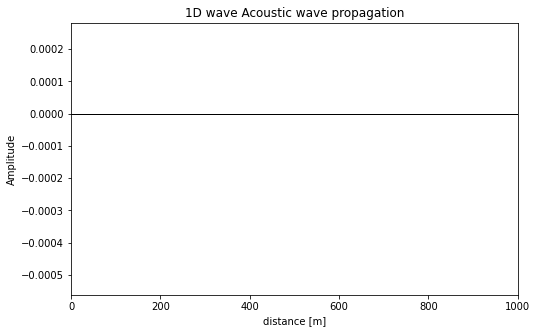

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# plt.style.use('ggplot')


fig, ax = plt.subplots(figsize=(8, 5))
ax.set(xlim=(0, L_x), ylim=(p_min, p_max))





line = ax.plot(X, P[0, :], color='k', lw=1)[0]

def animate(i):

 
    
  line.set_ydata(P[i, :])
 
  

anim = FuncAnimation(fig, animate, interval=100, frames=f)
plt.draw()
plt.xlabel('distance [m]')
plt.ylabel ('Amplitude')
plt.title ('1D wave Acoustic wave propagation')

plt.show()

In [55]:
anim.save('1D_acoustic_wave2.mp4')